

The best test accuracy is: 0.95440, the corresponding train accuracy is: 0.99950


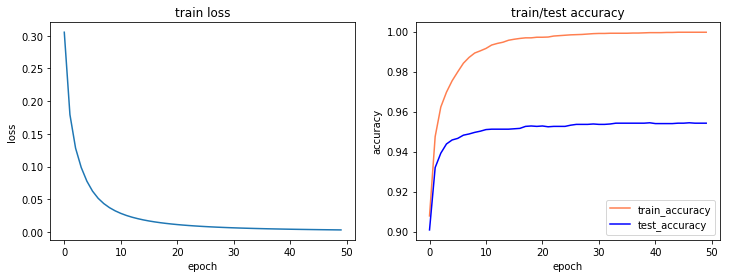

In [3]:
import matplotlib.pyplot as plt

#Note  此块用于汇报 需要在运行了下面一块以后再运行这块  

def plot(loss_history,train_accuracy_history,test_accuracy_history):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(range(len(loss_history)),loss_history)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.title("train loss")
    
    plt.subplot(1,2,2)
    plt.plot(range(len(train_accuracy_history)),train_accuracy_history,color='coral', label='train_accuracy')
    plt.plot(range(len(test_accuracy_history)),test_accuracy_history,color='blue', label='test_accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.title("train/test accuracy")
    plt.legend()

best_test=max(test_accuracy_history)
index=np.argmax(test_accuracy_history)
corresponding_train=train_accuracy_history[index]
    
print("\n\nThe best test accuracy is: "+"%.5f" %best_test+ ", the corresponding train accuracy is: "+ "%.5f" %corresponding_train)
plot(loss_history,train_accuracy_history,test_accuracy_history)

NUM_HIDDEN:  100
LEARNING_RATE:  1
BATCH_SIZE:  64
NUM_EPOCH:  50
len(trainX):  10000
len(testX):  5000
Shape of w: (79510,)
Epoch: 1 Train loss: 0.30537 Train Accuracy: 0.90780 Test Accuracy: 0.90080
Epoch: 2 Train loss: 0.17944 Train Accuracy: 0.94750 Test Accuracy: 0.93200
Epoch: 3 Train loss: 0.12812 Train Accuracy: 0.96230 Test Accuracy: 0.93920
Epoch: 4 Train loss: 0.09862 Train Accuracy: 0.96970 Test Accuracy: 0.94380
Epoch: 5 Train loss: 0.07771 Train Accuracy: 0.97540 Test Accuracy: 0.94580
Epoch: 6 Train loss: 0.06248 Train Accuracy: 0.97990 Test Accuracy: 0.94660
Epoch: 7 Train loss: 0.05146 Train Accuracy: 0.98420 Test Accuracy: 0.94820
Epoch: 8 Train loss: 0.04340 Train Accuracy: 0.98710 Test Accuracy: 0.94880
Epoch: 9 Train loss: 0.03723 Train Accuracy: 0.98930 Test Accuracy: 0.94960
Epoch: 10 Train loss: 0.03238 Train Accuracy: 0.99040 Test Accuracy: 0.95020
Epoch: 11 Train loss: 0.02848 Train Accuracy: 0.99160 Test Accuracy: 0.95100
Epoch: 12 Train loss: 0.02527 Train A

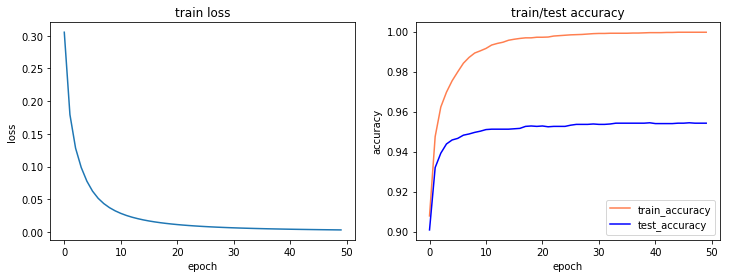

In [2]:
import numpy as np
import time

## Network architecture
NUM_INPUT = 784  # Number of input neurons
NUM_OUTPUT = 10  # Number of output neurons
NUM_CHECK = 5  # Number of examples on which to check the gradient

## Hyperparameters
NUM_HIDDEN = 100
LEARNING_RATE = 1
BATCH_SIZE = 64
NUM_EPOCH = 50


print("NUM_HIDDEN: ", NUM_HIDDEN)
print("LEARNING_RATE: ", LEARNING_RATE)
print("BATCH_SIZE: ", BATCH_SIZE)
print("NUM_EPOCH: ", NUM_EPOCH)

# Given a vector w containing all the weights and biased vectors, extract
# and return the individual weights and biases W1, b1, W2, b2.
def unpack (w):
    W1 = np.reshape(w[:NUM_INPUT * NUM_HIDDEN],(NUM_INPUT,NUM_HIDDEN))
    w = w[NUM_INPUT * NUM_HIDDEN:]
    b1 = np.reshape(w[:NUM_HIDDEN], NUM_HIDDEN)
    w = w[NUM_HIDDEN:]
    W2 = np.reshape(w[:NUM_HIDDEN*NUM_OUTPUT], (NUM_HIDDEN,NUM_OUTPUT))
    w = w[NUM_HIDDEN*NUM_OUTPUT:]
    b2 = np.reshape(w,NUM_OUTPUT)
    return W1, b1, W2, b2

# Given individual weights and biases W1, b1, W2, b2, concatenate them and
# return a vector w containing all of them.
def pack (W1, b1, W2, b2):
    W1_ = np.reshape(W1,NUM_INPUT*NUM_HIDDEN)
    # print(W1_.shape)
    W2_ = np.reshape(W2,NUM_HIDDEN*NUM_OUTPUT)
    # print(W2_.shape)
    w = np.concatenate((W1_,b1, W2_, b2))
    # print(w.shape)
    return w

# Load the images and labels from a specified dataset (train or test).
def loadData (which):
    images = np.load("./data/mnist_{}_images.npy".format(which))
    labels = np.load("./data/mnist_{}_labels.npy".format(which))
    return images, labels

## 1. Forward Propagation
# Given training images X, associated labels Y, and a vector of combined weights
# and bias terms w, compute and return the cross-entropy (CE) loss.

def fCE (X, Y, w):
    # print(X.shape)
    W1, b1, W2, b2 = unpack(w)
    loss = 0.0
    ## your code here
    n=X.shape[0]
    # X n,784  W1 784*50
    z1=np.dot(X,W1)+b1  # z1 n*50
    h1=np.maximum(0,z1)  # h1 n*50
    z2=np.dot(h1,W2)+b2   # w2 50*10 z2 n*10
    y_hat=np.exp(z2)/np.sum(np.exp(z2),axis=1,keepdims=True)
    cache={}
    cache['z1']=z1
    cache['z2']=z2
    cache['h1']=h1
    cache['y_hat']=y_hat
    loss=-np.sum(Y*np.log(y_hat))/n
#     print(loss)
    return loss,cache

## 2. Backward Propagation
# Given training images X, associated labels Y, and a vector of combined weights
# and bias terms w, compute and return the gradient of fCE. 
def gradCE (X, Y, w,cache):
    W1, b1, W2, b2 = unpack(w)
    
    ## your code here
    n=X.shape[0]
    z1=cache['z1'] # n*50
    z2=cache['z2'] # n*10
    h1=cache['h1'] # n*50
    y_hat=cache['y_hat'] # n*10
    
    # W2 50*10 delta_y n*10
    delta_y=y_hat-Y #  n*10
    
    delta_W_2= np.dot(h1.T,delta_y)/n
    
    # b2 10
    delta_b_2=np.sum(delta_y,axis=0)/n
    
    # W1 784*50  X=n*784
    sgn_z1=np.int64(z1>0)  # n*50
    delta_W_1=np.dot(X.T,np.dot(delta_y,W2.T)*sgn_z1)/n
    
    # b1 50
    delta_b_1=np.sum(np.dot(delta_y,W2.T)*sgn_z1,axis=0)/n  
    
    delta = pack(delta_W_1, delta_b_1, delta_W_2, delta_b_2)
    
    return delta

## 3. Parameter Update
# Given training and testing datasets and an initial set of weights/biases,
# train the NN.
loss_history=[]
train_accuracy_history=[]
test_accuracy_history=[]

def train(trainX, trainY, testX, testY, w):
    ## your code here

    n=trainX.shape[0]
    iters=int(n/BATCH_SIZE)
    for i in range(NUM_EPOCH):
        #shuffle
#         randnum = random.randint(0,100)
#         random.seed(randnum)
#         random.shuffle(trainX)
#         random.seed(randnum)
#         random.shuffle(trainY)
        for j in range(iters+1):
        #构造batch
            startIndex=j*BATCH_SIZE
            endIndex=max(startIndex+BATCH_SIZE-1,n)
            batchX=trainX[startIndex:endIndex,:]
            batchY=trainY[startIndex:endIndex,:]
        #训练
            loss,cache=fCE(batchX,batchY,w)
        #bp
            delta=gradCE (batchX, batchY, w,cache)
        #updata
            W1, b1, W2, b2 = unpack(w)
            delta_W_1, delta_b_1, delta_W_2, delta_b_2=unpack(delta)
            W1=W1-LEARNING_RATE*delta_W_1
            b1=b1-LEARNING_RATE*delta_b_1
            W2=W2-LEARNING_RATE*delta_W_2
            b2=b2-LEARNING_RATE*delta_b_2
            w = pack(W1, b1, W2, b2)
        
        #每个epoch训练集loss与精度
        train_loss,cache=fCE(trainX,trainY,w)
        m_train=trainX.shape[0]
        train_y_hat=cache['y_hat']
        train_predict_label=np.argmax(train_y_hat, axis=1)
        train_true_label=np.argmax(trainY, axis=1)
        train_accuracy=np.sum((train_predict_label == train_true_label)/float(m_train))
        loss_history.append(train_loss)
        train_accuracy_history.append(train_accuracy)
        
        #每个epoch测试集loss与精度
        test_loss,cache=fCE(testX,testY,w)
        m_test=testX.shape[0]
        test_y_hat=cache['y_hat']
        test_predict_label=np.argmax(test_y_hat, axis=1)
        test_true_label=np.argmax(testY, axis=1)
        test_accuracy=np.sum((test_predict_label == test_true_label)/float(m_test))
        test_accuracy_history.append(test_accuracy)
        
        print("Epoch: "+ str(i+1)+" Train loss: "+ "%.5f" % train_loss+" Train Accuracy: "  +
             "%.5f" %train_accuracy+" Test Accuracy: "  + "%.5f" %test_accuracy)

if __name__ == "__main__":
    # Load data
    start_time = time.time()
    trainX, trainY = loadData("train")
    testX, testY = loadData("test")

    print("len(trainX): ", len(trainX))
    print("len(testX): ", len(testX))
    
#     print(trainY.shape)

    # Initialize weights randomly
    W1 = 2*(np.random.random(size=(NUM_INPUT, NUM_HIDDEN))/NUM_INPUT**0.5) - 1./NUM_INPUT**0.5
    b1 = 0.01 * np.ones(NUM_HIDDEN)
    W2 = 2*(np.random.random(size=(NUM_HIDDEN, NUM_OUTPUT))/NUM_HIDDEN**0.5) - 1./NUM_HIDDEN**0.5
    b2 = 0.01 * np.ones(NUM_OUTPUT)
    
    w = pack(W1, b1, W2, b2)
    print("Shape of w:",w.shape)

    # # Train the network and report the accuracy on the training and test set.
    train(trainX, trainY, testX, testY, w)
    
    best_test=max(test_accuracy_history)
    index=np.argmax(test_accuracy_history)
    corresponding_train=train_accuracy_history[index]
    
    print("\n\nThe best test accuracy is: "+"%.5f" %best_test+ ", the corresponding train accuracy is: "+ "%.5f" %corresponding_train)
    plot(loss_history,train_accuracy_history,test_accuracy_history)